# EDA

## Marta ---------------------------------------------------------

put all of your code between here and the next person's name only

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%config InlineBackend.figure_format = 'retina'

In [2]:
noaa_data = pd.read_csv('data/noaa_data_clean.csv', index_col= False)

In [3]:
noaa_data.columns

Index(['statecode', 'division', 'yearmonth', 'pcp', 'tavg', 'pdsi', 'phdi',
       'zndx', 'pmdi', 'cdd', 'hdd', 'sp01', 'sp02', 'sp03', 'sp06', 'sp09',
       'sp12', 'sp24', 'tmin', 'tmax', 'state', 'month', 'year'],
      dtype='object')

In [4]:
noaa_data.describe()

,statecode,division,yearmonth,pcp,tavg,pdsi,phdi,zndx,pmdi,cdd,...,sp02,sp03,sp06,sp09,sp12,sp24,tmin,tmax,month,year
count,15773.000000,15773.0,15773.000000,15773.000000,15773.000000,15773.000000,15773.000000,15773.000000,15773.000000,15773.000000,...,15773.000000,15773.000000,15773.000000,15773.000000,15773.000000,15773.000000,15773.000000,15773.000000,15773.000000,15773.000000
mean,29.011983,0.0,196031.220250,1.798108,49.823100,-0.042626,-0.007612,-0.009817,-0.009464,71.745261,...,0.002406,0.002114,0.001143,0.000399,-0.000359,-0.005024,37.003638,62.635346,6.494453,1960.247258
std,28.923192,0.0,3449.611004,1.573904,15.389533,2.594346,2.720131,1.912373,2.578275,132.719848,...,0.994421,0.997021,0.997939,0.999281,1.000042,1.004099,13.798940,17.259781,3.451530,34.496189
min,2.000000,0.0,190101.000000,0.000000,-3.900000,-9.090000,-9.090000,-7.140000,-9.090000,0.000000,...,-3.090000,-3.090000,-3.090000,-3.090000,-3.090000,-3.090000,-15.100000,6.700000,1.000000,1901.000000
25%,5.000000,0.0,193011.000000,0.690000,37.600000,-1.870000,-2.060000,-1.350000,-1.810000,0.000000,...,-0.670000,-0.680000,-0.680000,-0.670000,-0.660000,-0.670000,26.600000,49.000000,3.000000,1930.000000
50%,26.000000,0.0,196009.000000,1.430000,49.700000,-0.210000,-0.440000,-0.170000,-0.060000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,36.800000,62.900000,6.000000,1960.000000
75%,35.000000,0.0,199008.000000,2.450000,62.900000,1.720000,2.000000,1.130000,1.730000,78.000000,...,0.680000,0.660000,0.680000,0.670000,0.680000,0.650000,48.100000,77.600000,9.000000,1990.000000
max,110.000000,0.0,202010.000000,16.610000,84.100000,12.510000,12.510000,10.030000,12.510000,788.000000,...,3.090000,3.090000,3.090000,3.090000,3.090000,3.090000,68.800000,99.300000,12.000000,2020.000000


High level visualizations to spot and remove outliers:

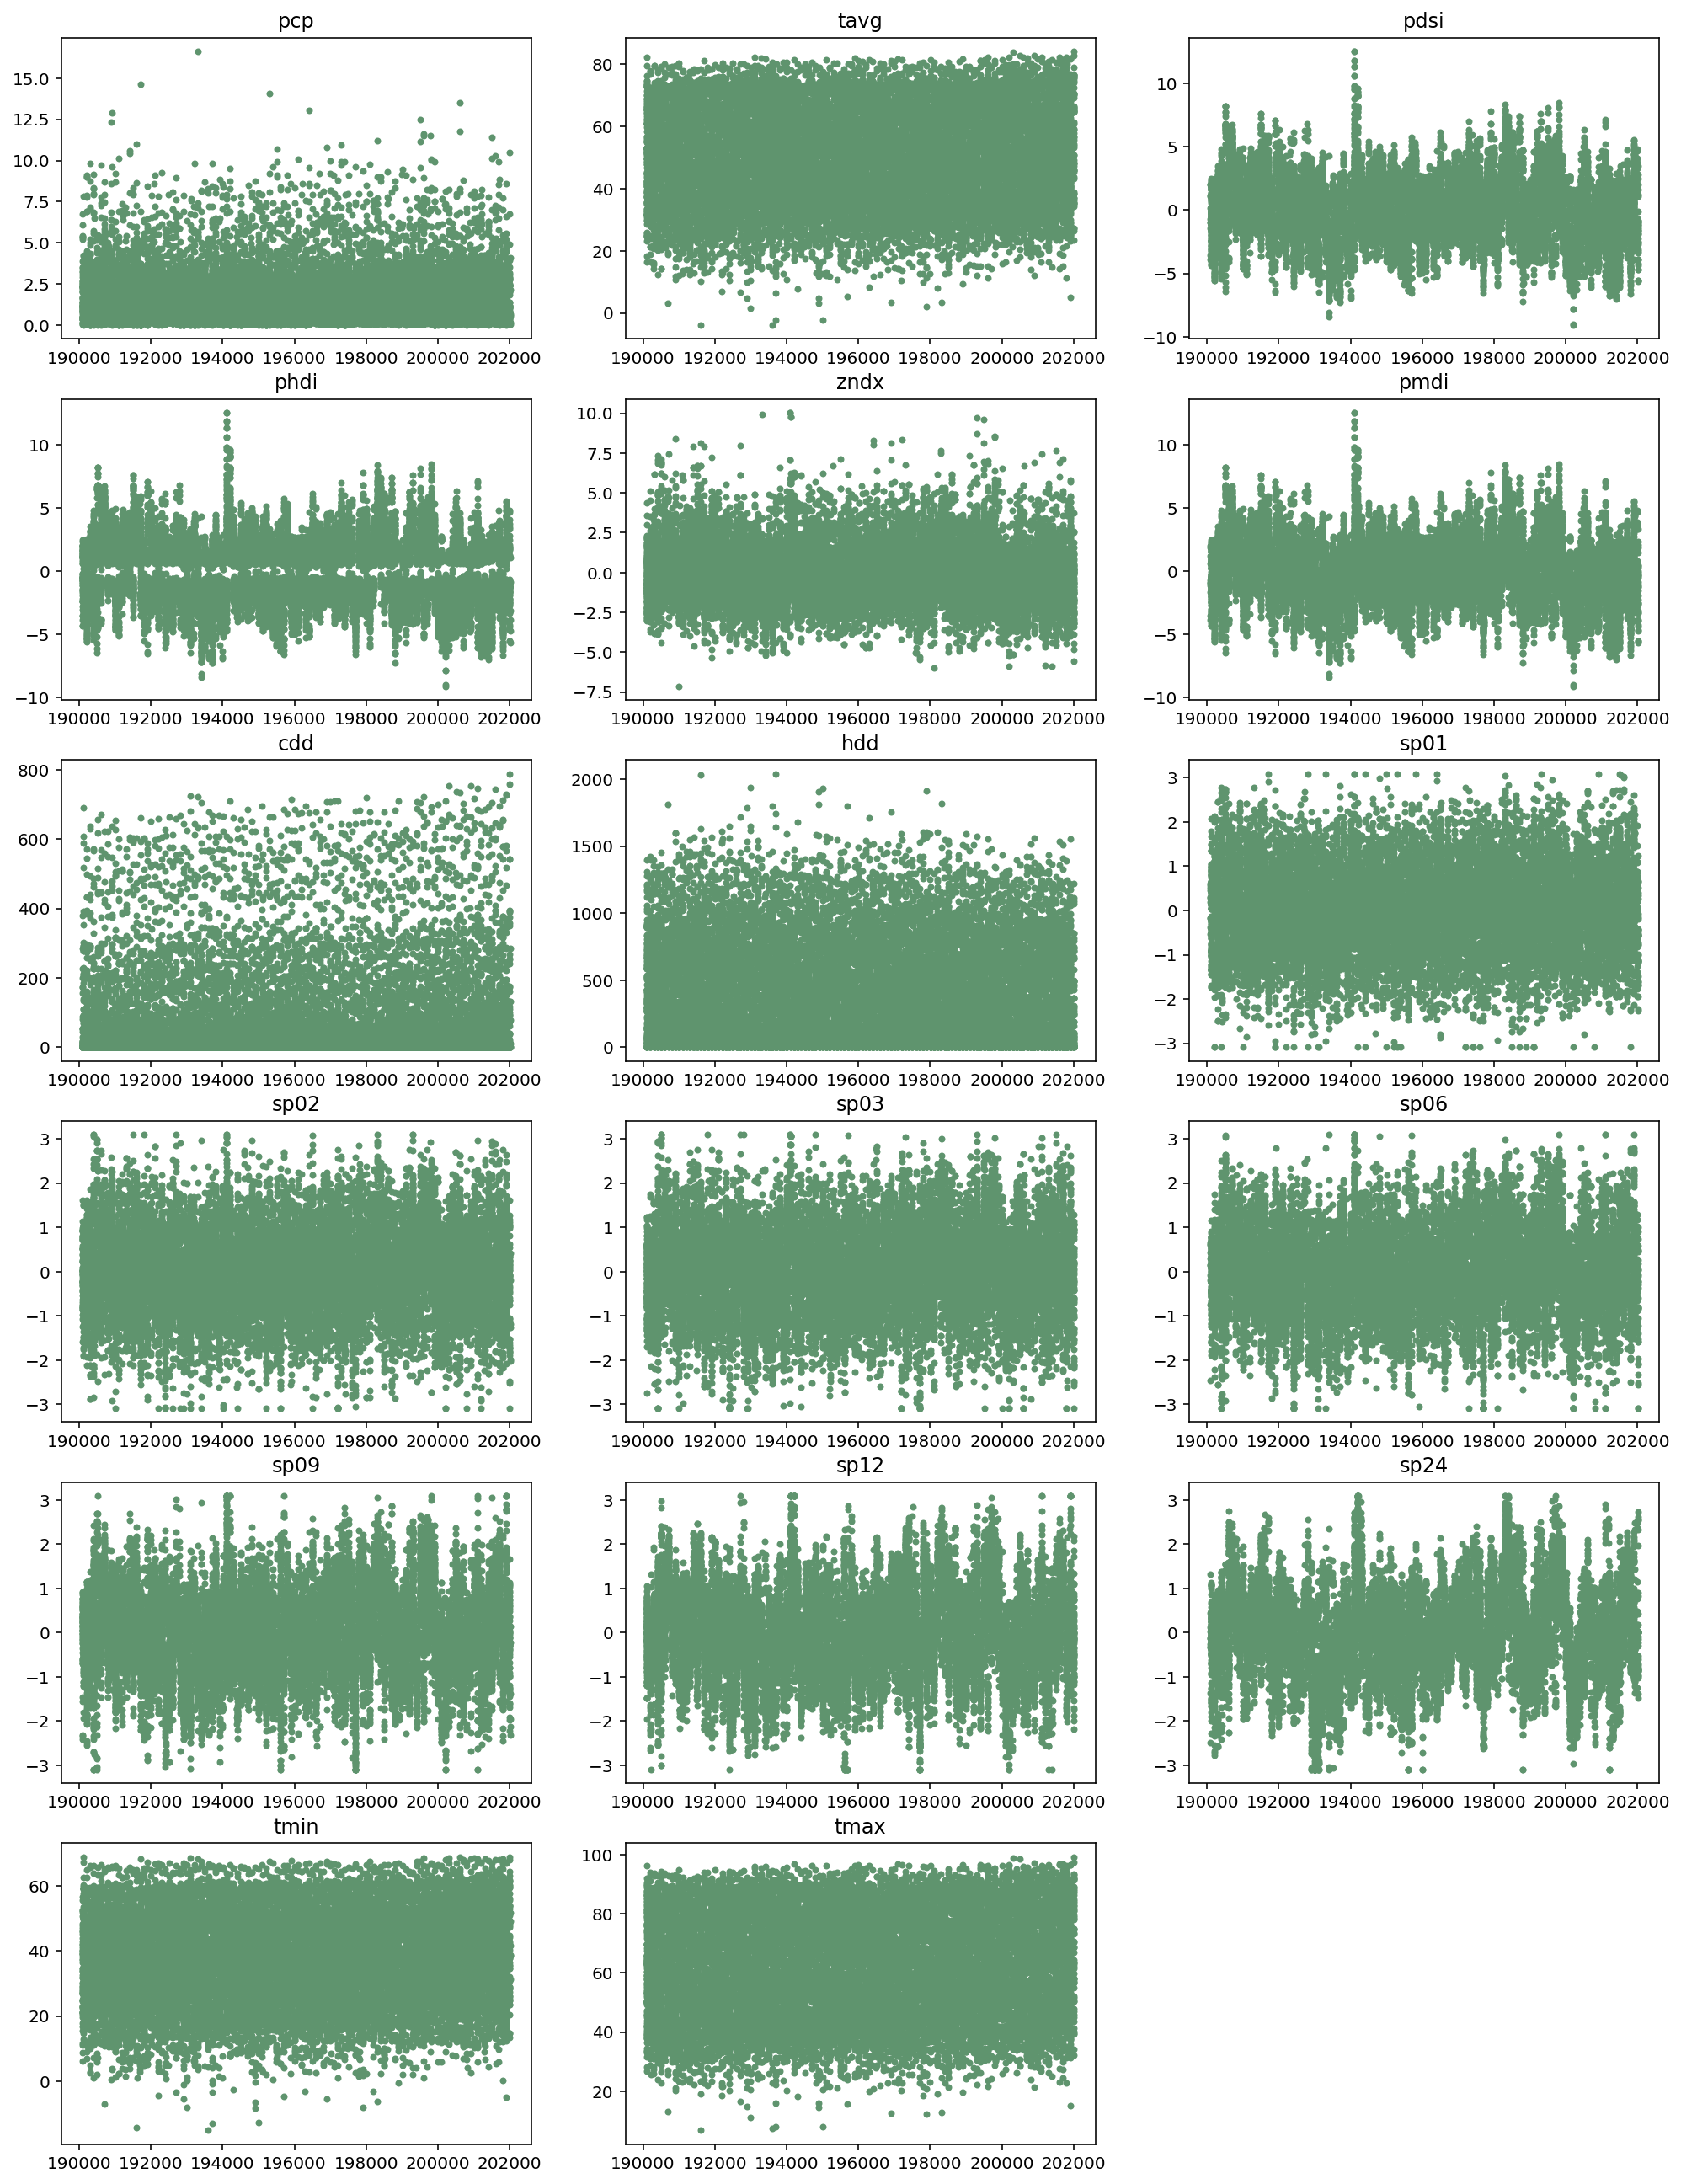

In [5]:
climate_cols = ['pcp', 'tavg', 'pdsi', 'phdi','zndx', 'pmdi', 'cdd', 'hdd', 'sp01', 'sp02', 'sp03', 'sp06', 'sp09',
               'sp12', 'sp24', 'tmin', 'tmax']

plt.figure(figsize=(17,23))
for i in range(len(climate_cols)):
    plt.subplot(6,3,i+1)
    plt.scatter(noaa_data['yearmonth'], noaa_data[climate_cols[i]], color = '#5f946e', marker = '.')
    plt.title(f"{climate_cols[i]}")
    
plt.savefig('./visuals/climate_scatters.png')

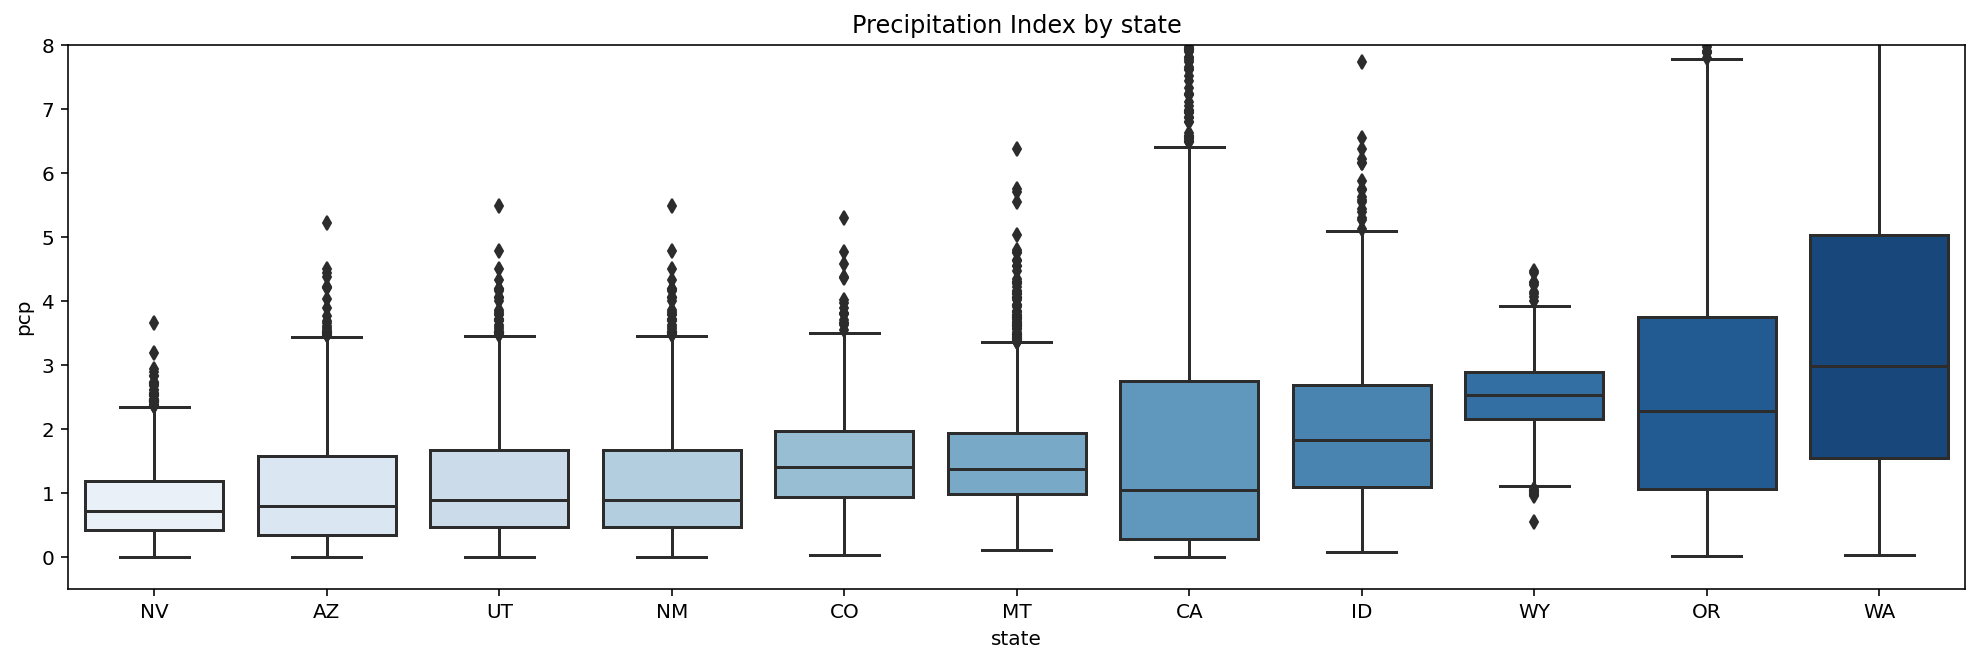

In [6]:
pcp_st_order = pd.DataFrame(noaa_data.groupby('state')['pcp'].mean().T).sort_values('pcp').index

plt.figure(figsize = (17,5))
sns.boxplot(data = noaa_data, x = 'state', y = 'pcp', palette = 'Blues', order = pcp_st_order)
plt.title('Precipitation Index by state')
plt.ylim(-0.5, 8.0);
plt.savefig('./visuals/pcp_by_state.png')

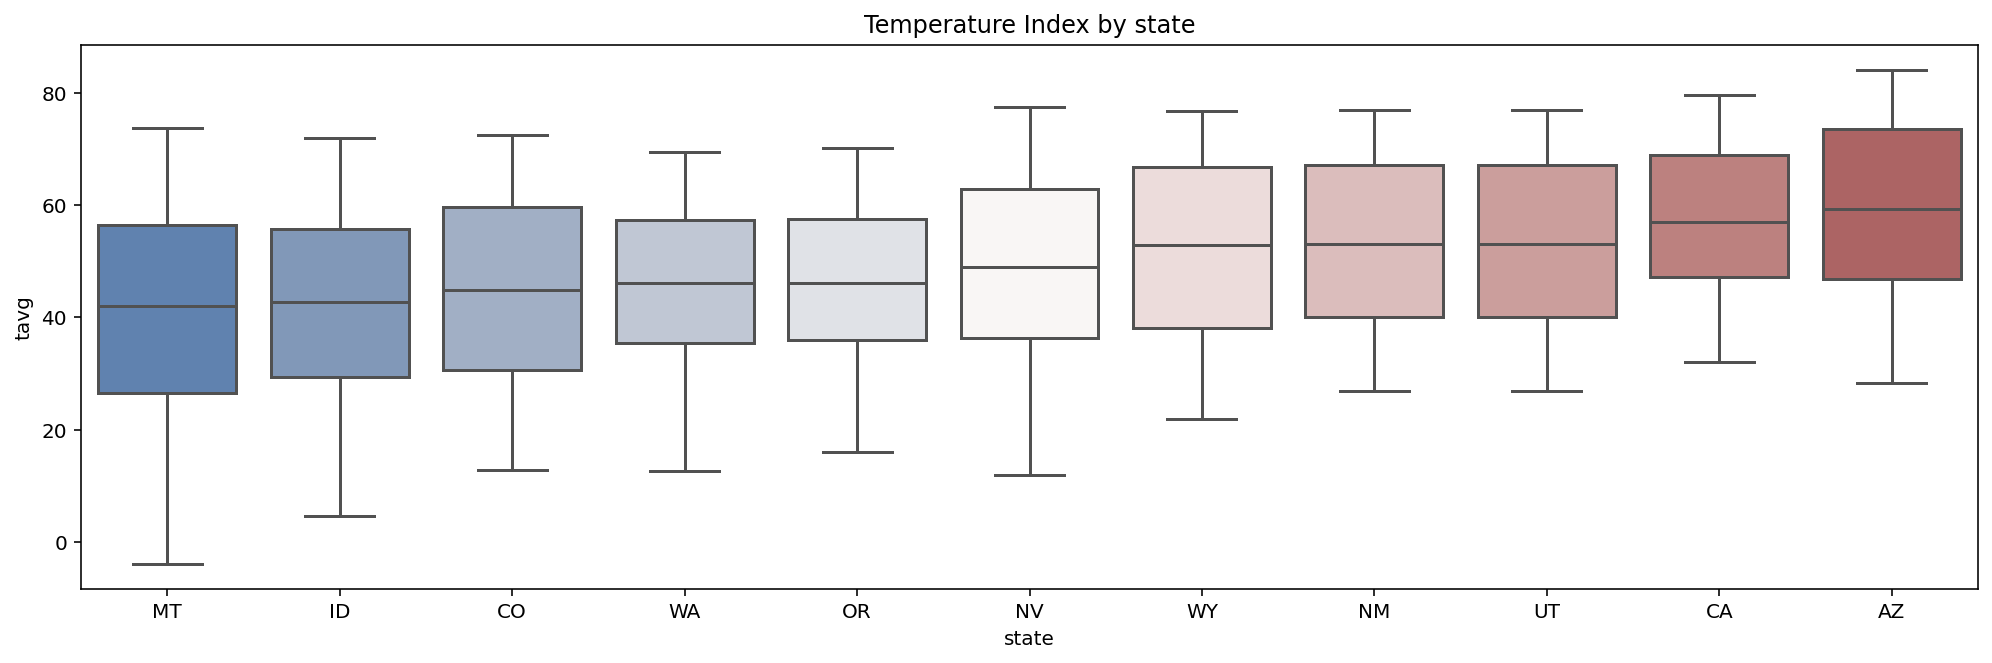

In [7]:
tavg_st_order = pd.DataFrame(noaa_data.groupby('state')['tavg'].mean().T).sort_values('tavg').index

plt.figure(figsize = (17,5))
sns.boxplot(data = noaa_data, x = 'state', y = 'tavg', palette= 'vlag', order = tavg_st_order)
plt.title('Temperature Index by state');
plt.savefig('./visuals/tavg_by_state.png')

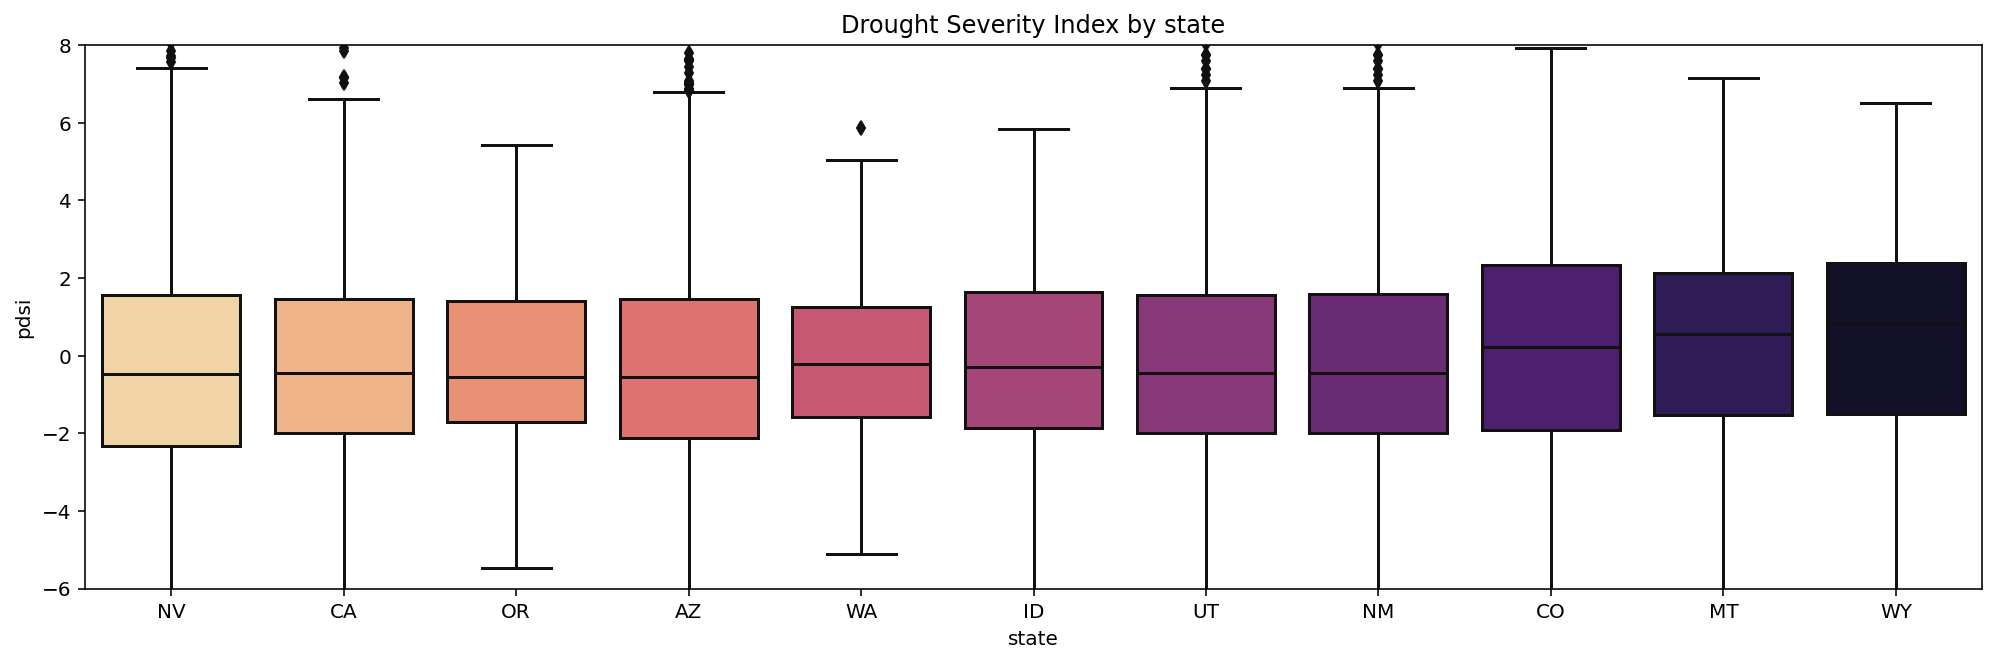

In [8]:
pdsi_st_order = pd.DataFrame(noaa_data.groupby('state')['pdsi'].mean().T).sort_values('pdsi').index

plt.figure(figsize = (17,5))
sns.boxplot(data = noaa_data, x = 'state', y = 'pdsi', palette= 'magma_r', order = pdsi_st_order)
plt.title('Drought Severity Index by state')
plt.ylim(-6,8);
plt.savefig('./visuals/pdsi_by_state.png')

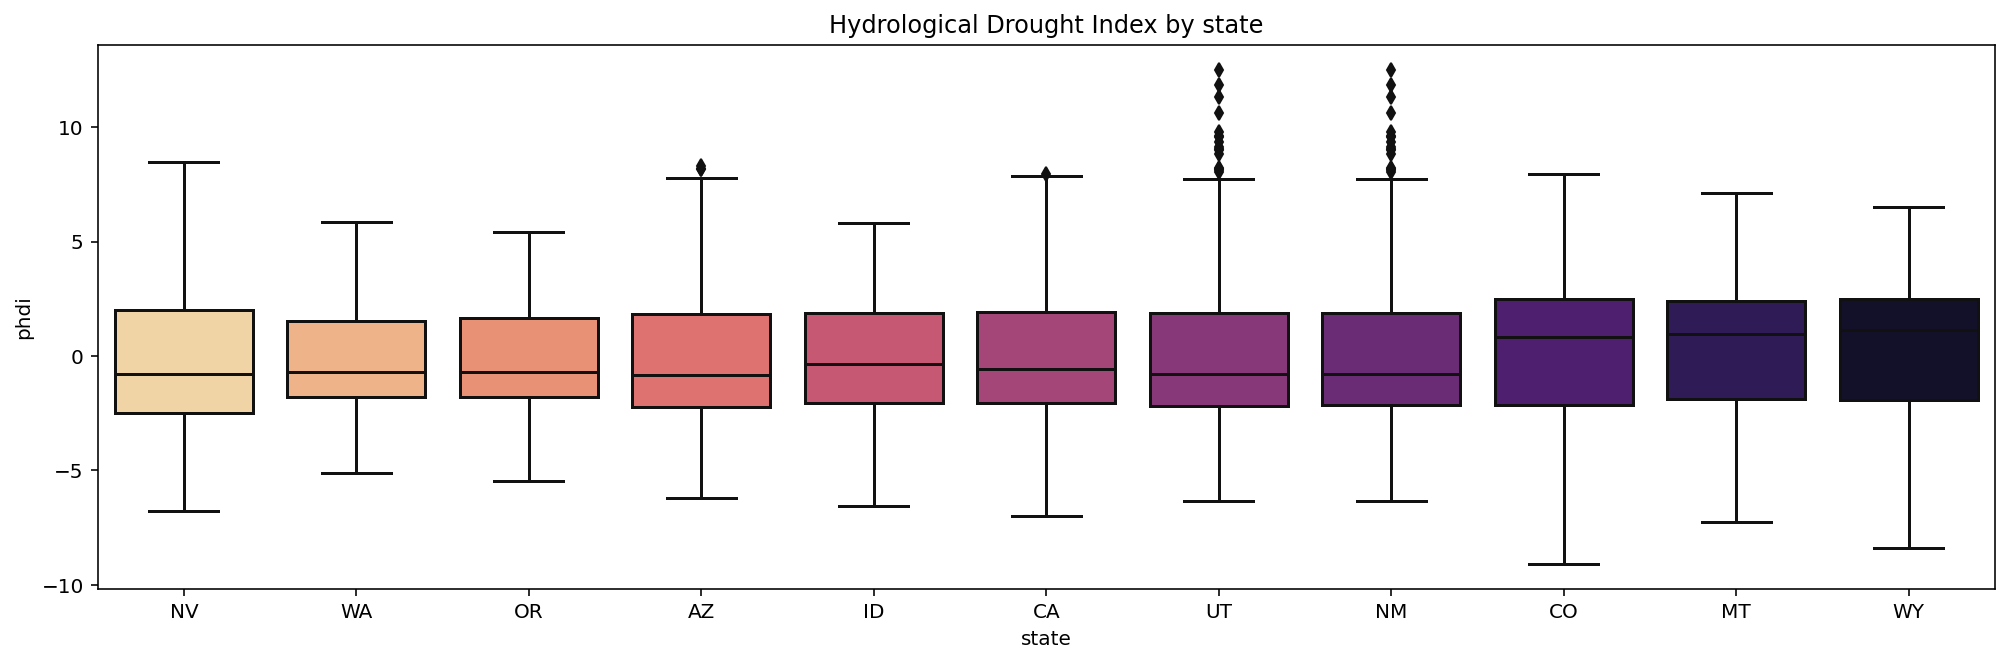

In [9]:
phdi_st_order = pd.DataFrame(noaa_data.groupby('state')['phdi'].mean().T).sort_values('phdi').index

plt.figure(figsize = (17,5))
sns.boxplot(data = noaa_data, x = 'state', y = 'phdi', order = phdi_st_order, palette= 'magma_r')
plt.title('Hydrological Drought Index by state');
plt.savefig('./visuals/phdi_by_state.png')

In [10]:
tmax_yr = noaa_data.groupby('year')['tmax'].mean().to_dict()
noaa_data['avg_yr_tmax'] = noaa_data['year'].apply(lambda x: tmax_yr[x])

tmin_yr = noaa_data.groupby('year')['tmin'].mean().to_dict()
noaa_data['avg_yr_tmin'] = noaa_data['year'].apply(lambda x: tmin_yr[x])

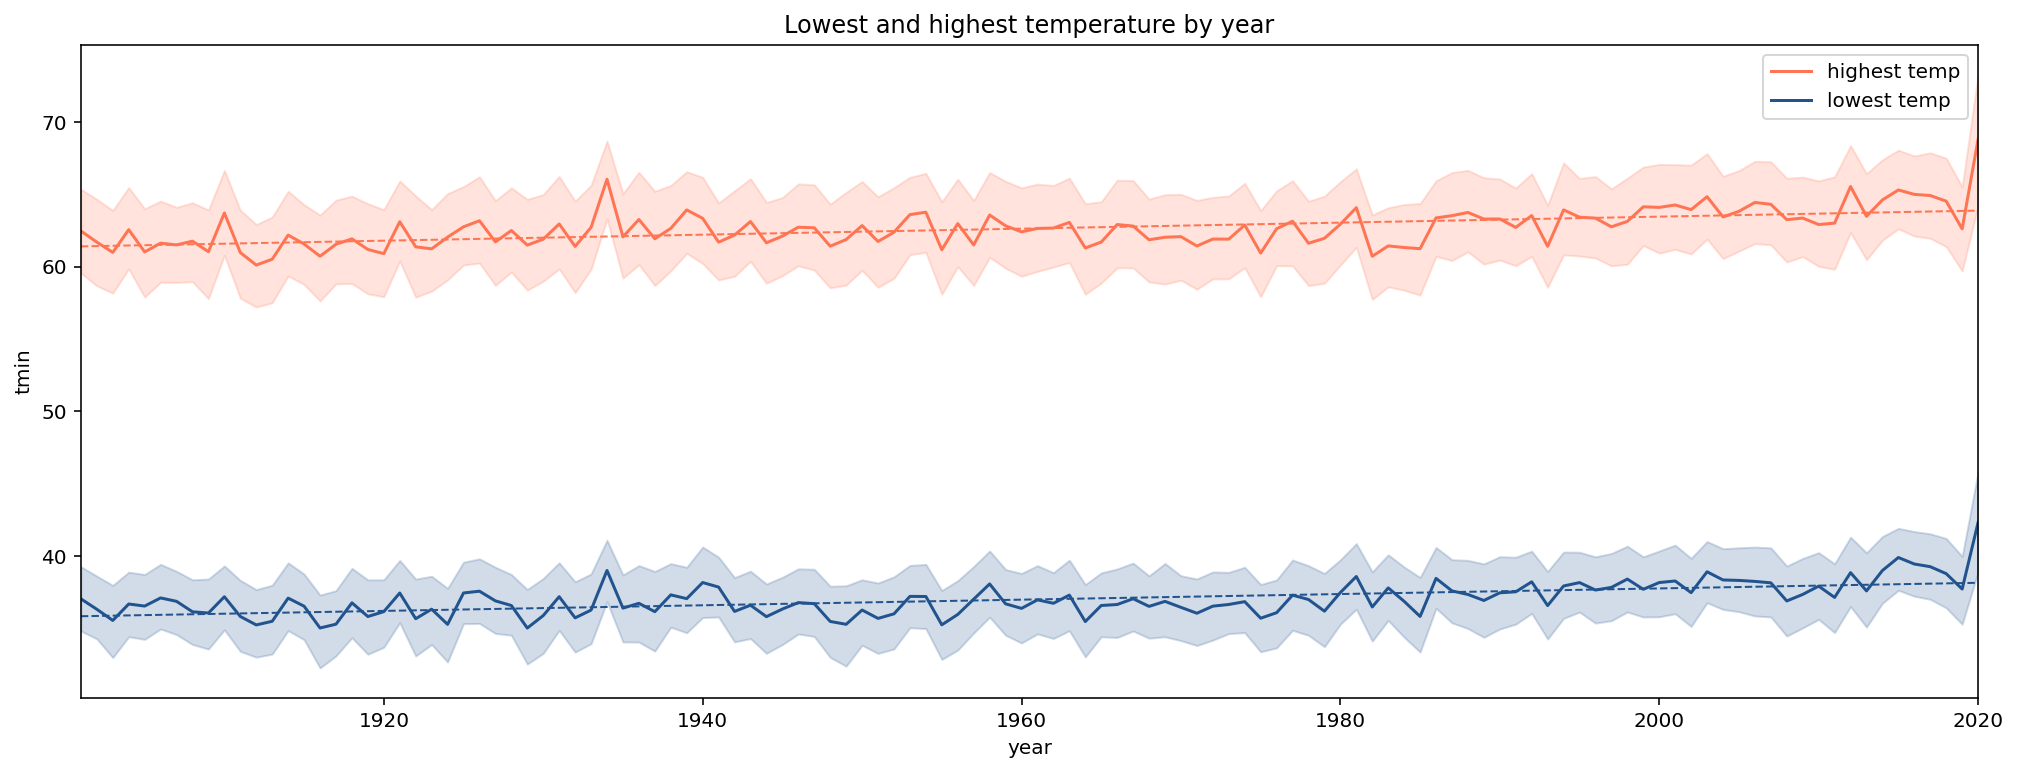

In [11]:
plt.figure(figsize = (17,6))
sns.lineplot(data = noaa_data, x = 'year', y = 'tmax', color = '#ff7452', label = 'highest temp')
sns.regplot(data = noaa_data, x = 'year', y = 'tmax',  scatter = False, ci = 0, line_kws={'lw': 1, 'ls': '--', 'color': '#ff7452'})
sns.lineplot(data = noaa_data, x = 'year', y = 'tmin', color = '#21538e', label = 'lowest temp')
sns.regplot(data = noaa_data, x = 'year', y = 'tmin', scatter = False, ci = 0, line_kws={'lw': 1, 'ls': '--',  'color': '#21538e'})

plt.title('Lowest and highest temperature by year')
plt.legend();
plt.savefig('./visuals/min_max_tmp_yr.png')

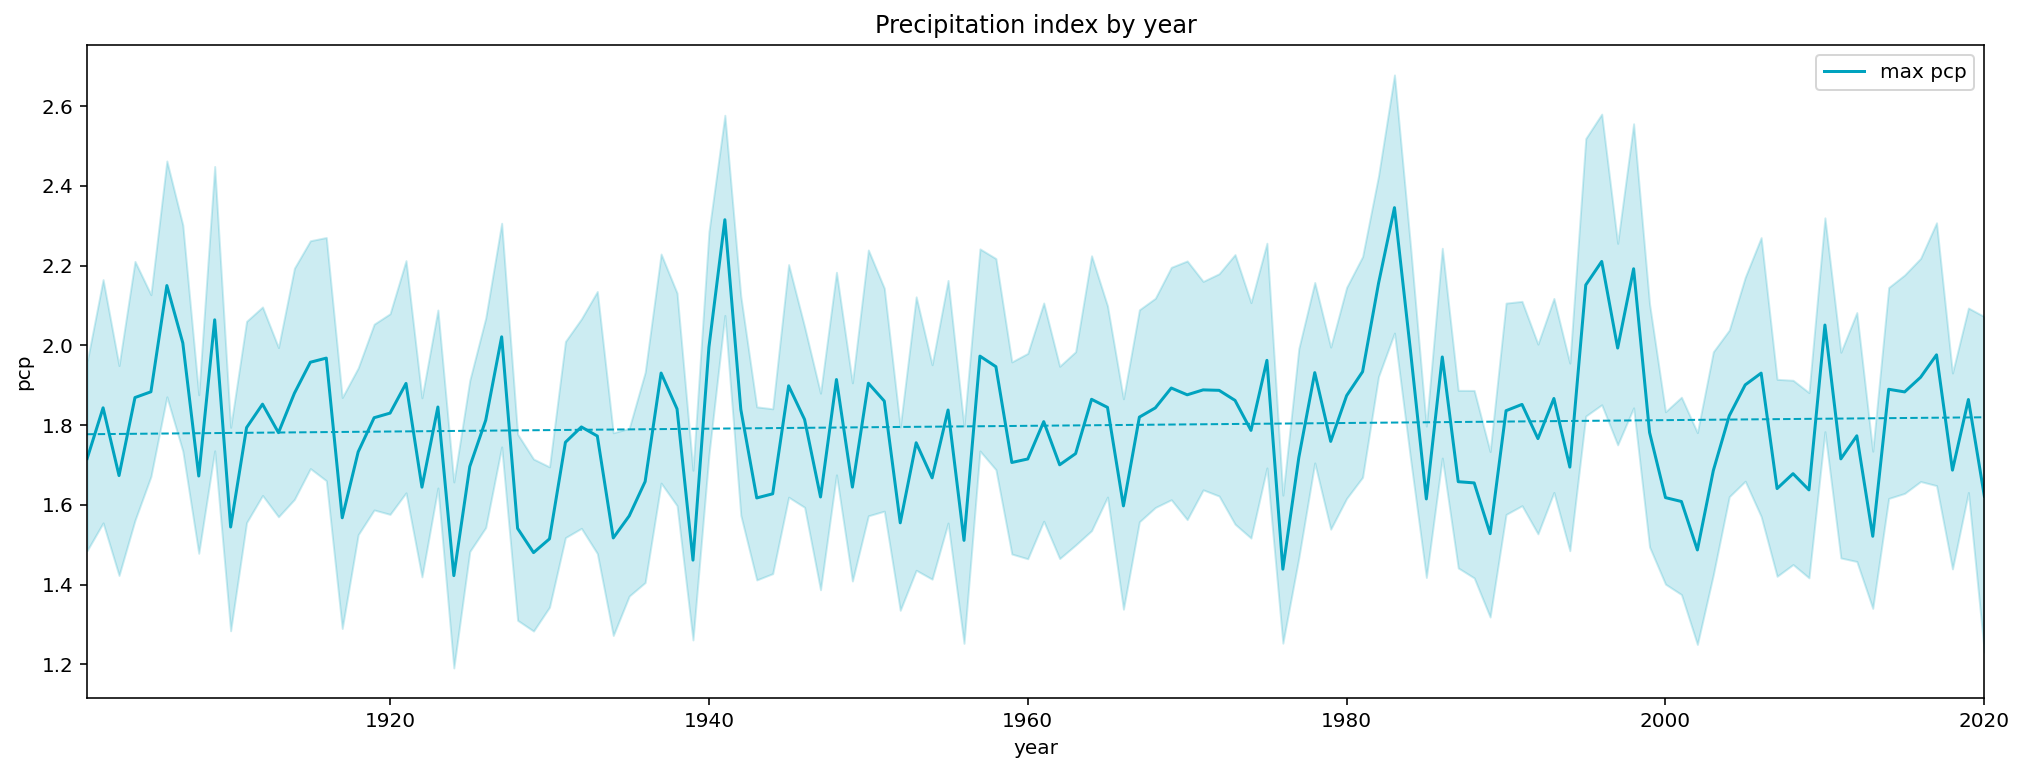

In [12]:
plt.figure(figsize = (17,6))
sns.regplot(data = noaa_data, x = 'year', y = 'pcp',  scatter = False, ci = 0, line_kws={'lw': 1, 'ls': '--', 'color': '#00a3bf'})
sns.lineplot(data = noaa_data, x = 'year', y = 'pcp', label = 'max pcp', color = '#00a3bf') #hue = 'state'
plt.title('Precipitation index by year')
#plt.legend();
plt.savefig('./visuals/precip_by_year.png')

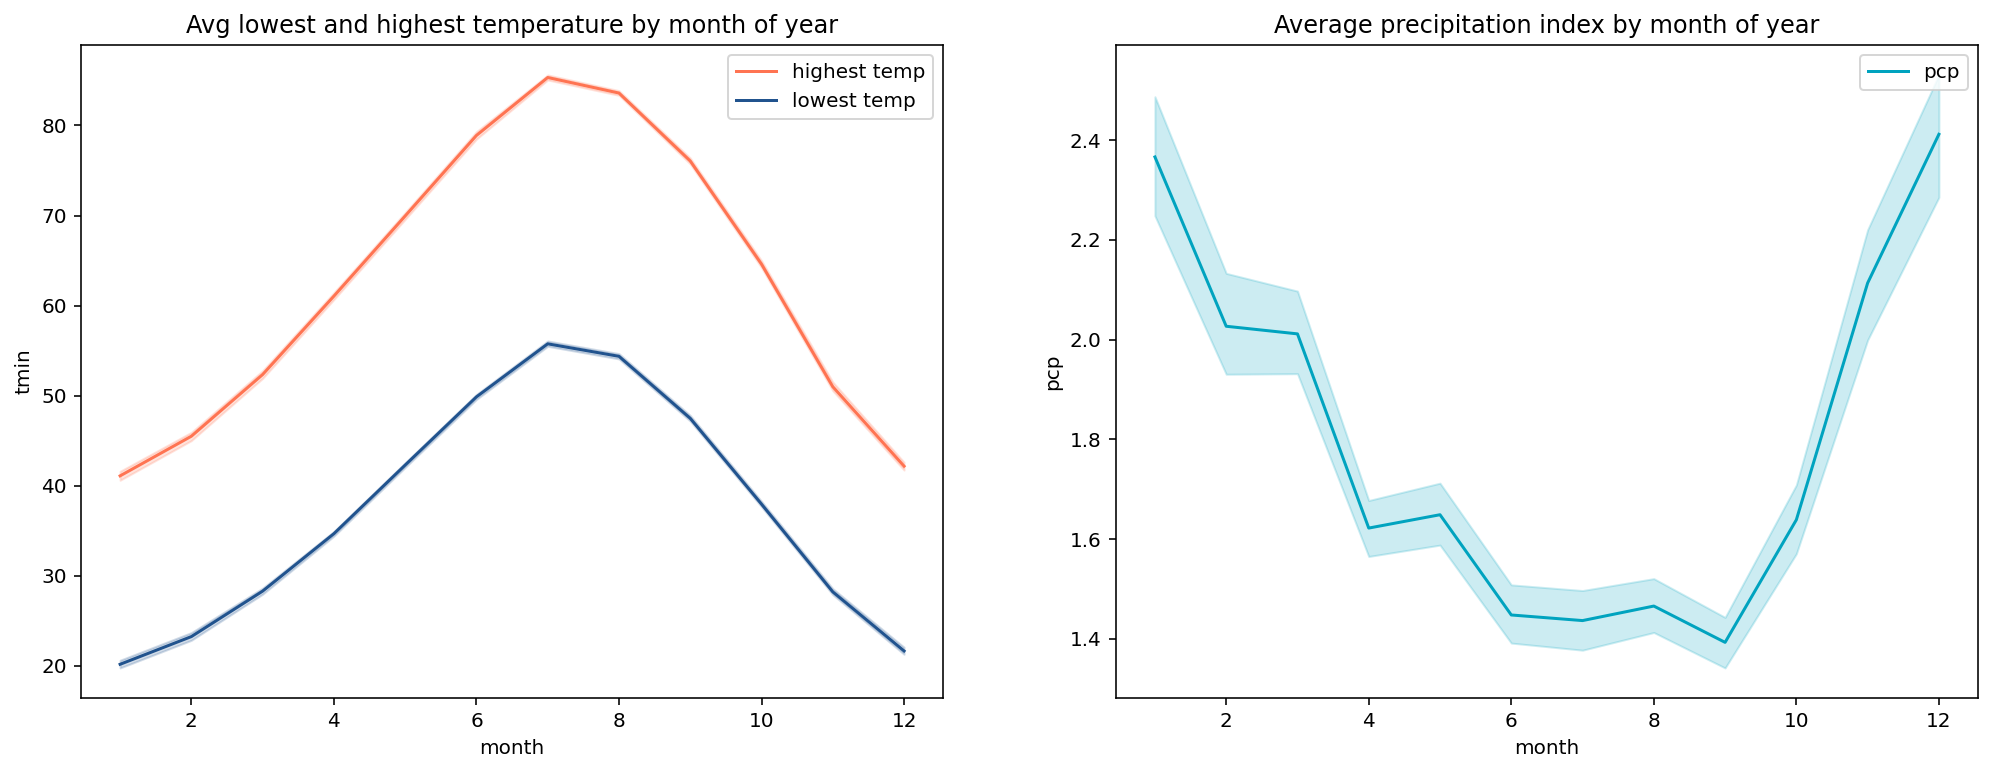

In [13]:
plt.figure(figsize = (17,6))
plt.subplot(1,2,1)
plt.title('Avg lowest and highest temperature by month of year')
sns.lineplot(data = noaa_data, x = 'month', y = 'tmax', color = '#ff7452', label = 'highest temp', ci = 95)
sns.lineplot(data = noaa_data, x = 'month', y = 'tmin', color = '#21538e', label = 'lowest temp', ci = 95)
plt.subplot(1,2,2)
sns.lineplot(data = noaa_data, x = 'month', y = 'pcp', label = 'pcp', color = '#00a3bf') #hue = 'state'
plt.title('Average precipitation index by month of year')
plt.legend();
plt.savefig('./visuals/tmp_pcp_mth.png')

In [14]:
fire_df = pd.read_pickle('./data/clean_fire_pickle.pkl')

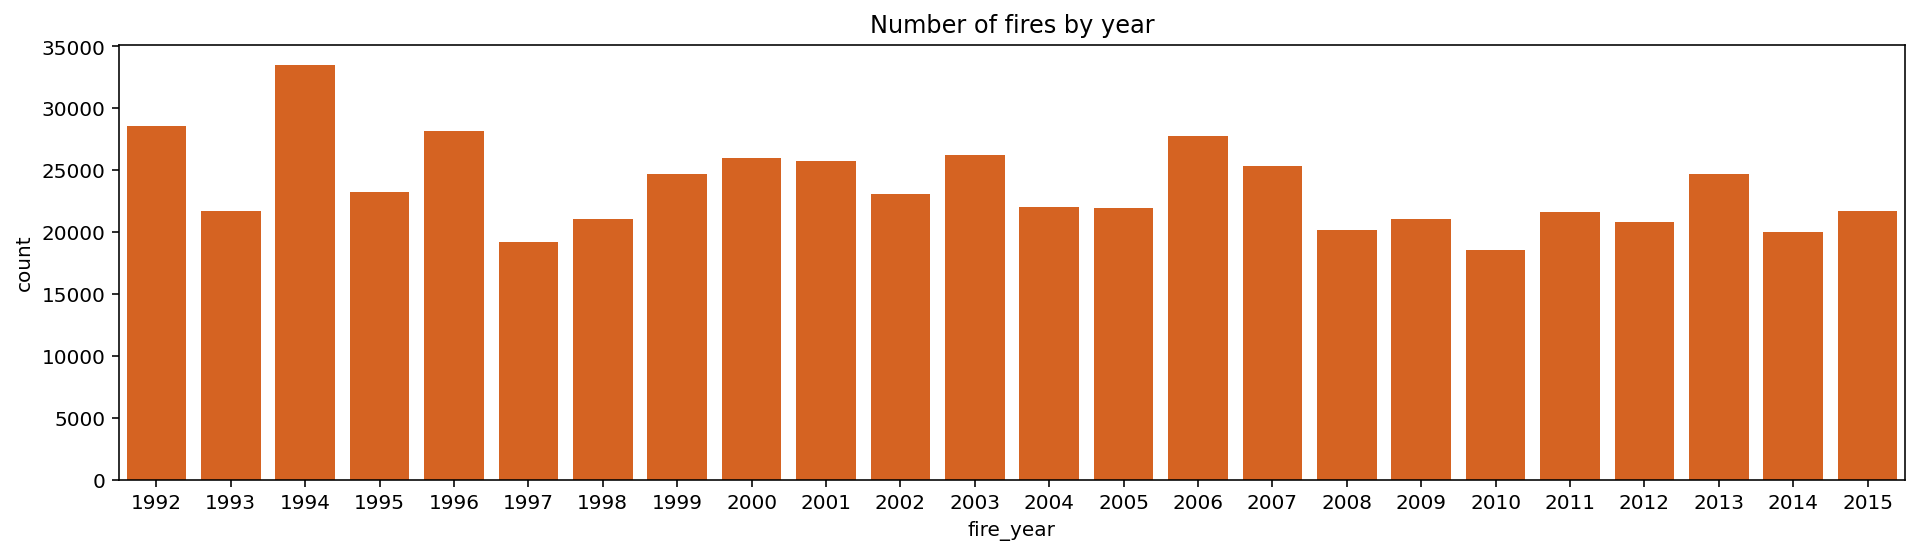

In [15]:
plt.figure(figsize = (16,4))
sns.countplot(data = fire_df, x = 'fire_year', color = '#F35B04')
plt.title("Number of fires by year");

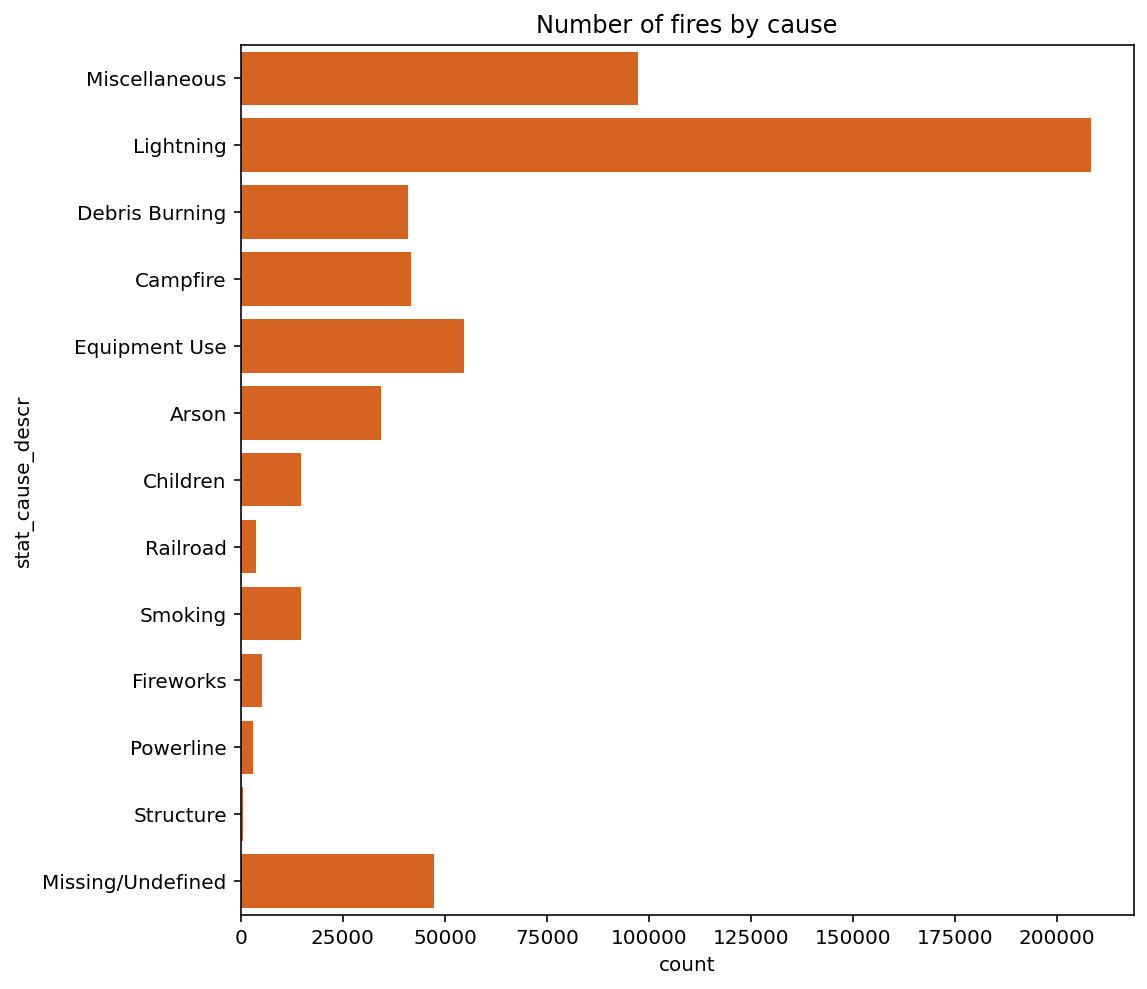

In [16]:
plt.figure(figsize = (8,8))
sns.countplot(data = fire_df, y = 'stat_cause_descr', color = '#F35B04', orient = 'h')
plt.title("Number of fires by cause");

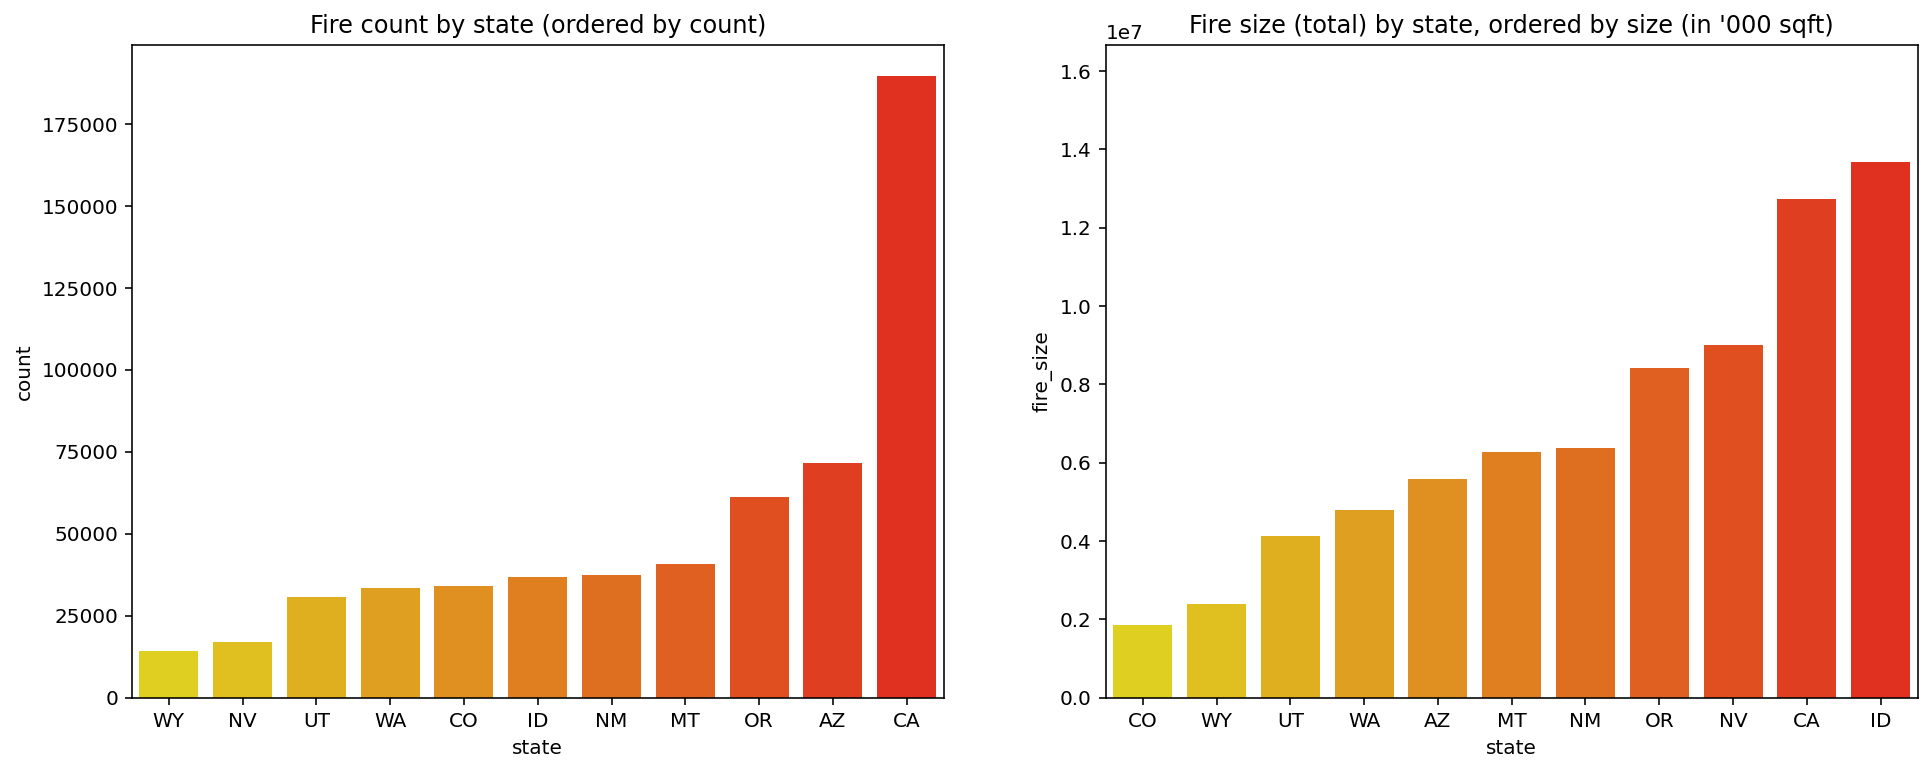

In [17]:
firect_st_order = pd.DataFrame(fire_df.groupby('state')['fire_code'].count().T).sort_values('fire_code').index
firesz_st_order = pd.DataFrame(fire_df.groupby('state')['fire_size'].sum().T).sort_values('fire_size').index

plt.figure(figsize = (16,6))
plt.subplot(1,2,1)
sns.countplot(data = fire_df, x = 'state', palette= 'autumn_r', order = firect_st_order)
plt.title('Fire count by state (ordered by count)')

plt.subplot(1,2,2)
sns.barplot(data = fire_df, x = 'state', y = 'fire_size', estimator= sum, order = firesz_st_order, palette= 'autumn_r', errwidth=0)
plt.title('Fire size (total) by state, ordered by size (in \'000 sqft)');
plt.savefig('./visuals/fires_by_state.png')

In [18]:
fire_df.head()

,fire_code,fire_name,complex_name,fire_year,stat_cause_code,stat_cause_descr,fire_size,fire_size_class,latitude,longitude,state,fips_code,cont_date_fixed,disc_date_fixed,time_burnt_fixed,time_burnt
0,BJ8K,FOUNTAIN,NO_NAME,2005,9.0,Miscellaneous,0.10,A,40.036944,-121.005833,CA,063,2005-02-02,2005-02-02,0 days,0.0
1,AAC0,PIGEON,NO_NAME,2004,1.0,Lightning,0.25,A,38.933056,-120.404444,CA,061,2004-05-12,2004-05-12,0 days,0.0
2,A32W,SLACK,NO_NAME,2004,5.0,Debris Burning,0.10,A,38.984167,-120.735556,CA,017,2004-05-31,2004-05-31,0 days,0.0
3,NA,DEER,NO_NAME,2004,1.0,Lightning,0.10,A,38.559167,-119.913333,CA,003,2004-07-03,2004-06-28,5 days,5.0
4,NA,STEVENOT,NO_NAME,2004,1.0,Lightning,0.10,A,38.559167,-119.933056,CA,003,2004-07-03,2004-06-28,5 days,5.0


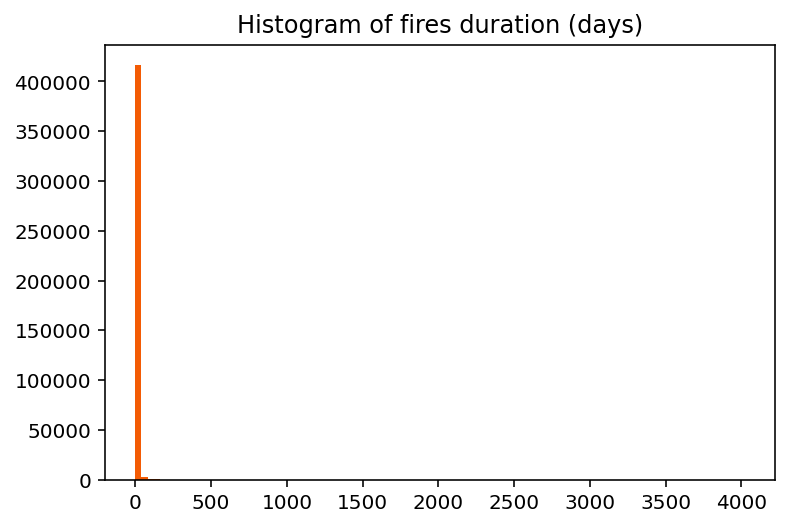

In [19]:
plt.hist(fire_df['time_burnt'], bins = 100, color = '#F35B04')
#plt.xlim(0,100)
plt.title('Histogram of fires duration (days)');

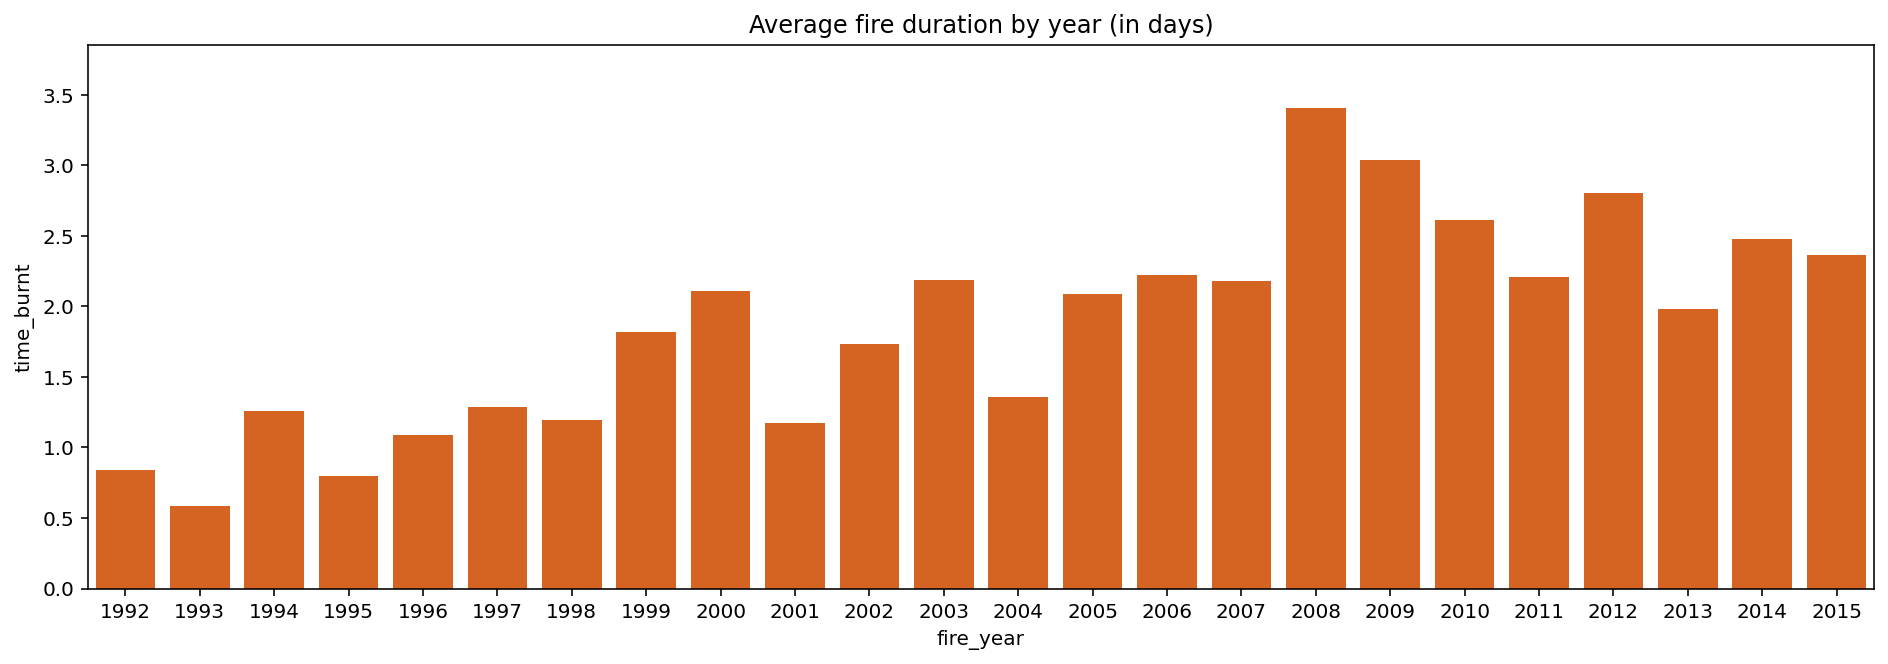

In [20]:
plt.figure(figsize = (16,5))
sns.barplot(data = fire_df, x = 'fire_year', y = 'time_burnt', color = '#F35B04', errwidth = 0)
plt.title('Average fire duration by year (in days)');

In [22]:
# this may migrate to cleaning as a sanity check (if DOY information is restored because it seems to have been removed)
months = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
days = [31,28,31, 30, 31, 30, 31, 31, 30, 31,30,31]
def doy_to_date(doy):
    if doy <= 31:
        date = "jan-"+str(doy)
        return date
    elif doy > sum(days[:-1]):
        date = "dec-"+str(doy-sum(days[:-1]))
        return date
    else:
        for i in range(2,12):
            if doy <= sum(days[:i]) and doy > sum(days[:i-1]):
                date = str(months[i])+"-"+str(doy-sum(days[:i-1]))
                return date

#fire_df['disc_date'] = fire_df['discovery_doy'].apply(lambda x: doy_to_date(x))
#fire_df['disc_mth'] = fire_df['disc_date'].apply(lambda x: x[:3])
#fire_df['cont_date'] = fire_df['cont_doy'].apply(lambda x: doy_to_date(x))

In [23]:
fire_df['disc_mth'] = fire_df['disc_date_fixed'].apply(lambda x: x.month)

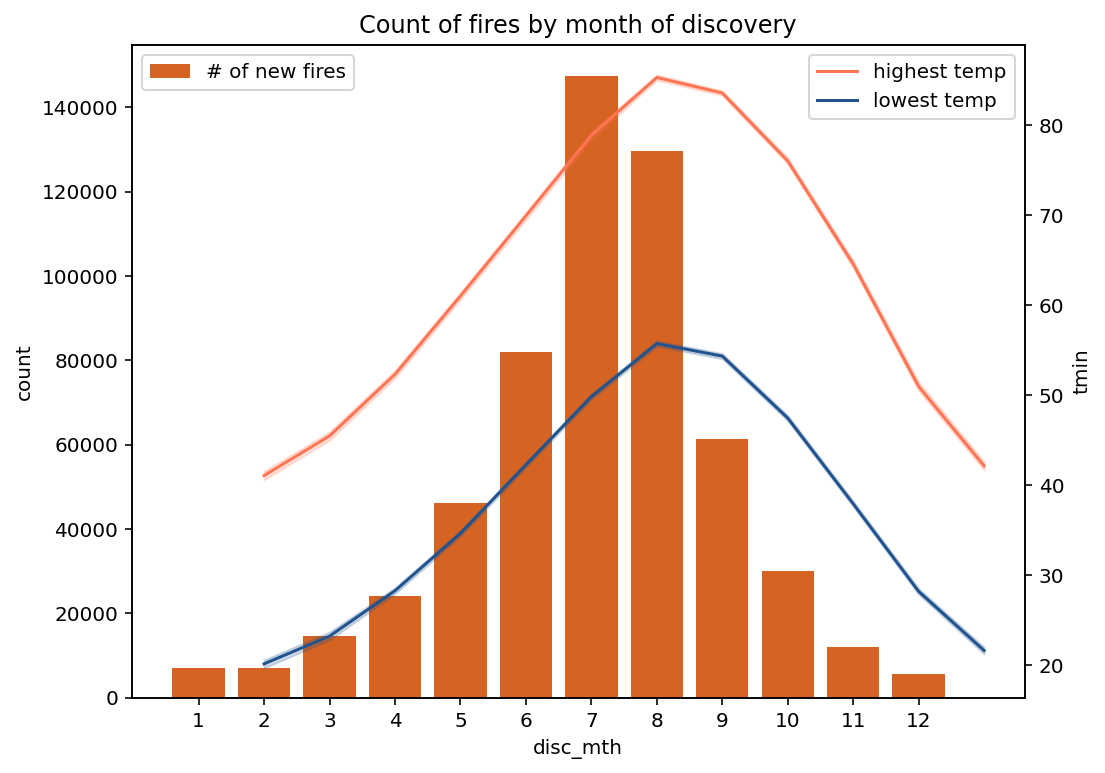

In [31]:
fig, ax1 = plt.subplots(figsize = (8,6))
sns.countplot(data = fire_df, x = 'disc_mth', color = '#F35B04', label = '# of new fires')
plt.legend(loc='upper left')
ax2 = ax1.twinx()
sns.lineplot(data = noaa_data, x = 'month', y = 'tmax', color = '#ff7452', label = 'highest temp')
sns.lineplot(data = noaa_data, x = 'month', y = 'tmin', color = '#21538e', label = 'lowest temp')
plt.title('Count of fires by month of discovery');

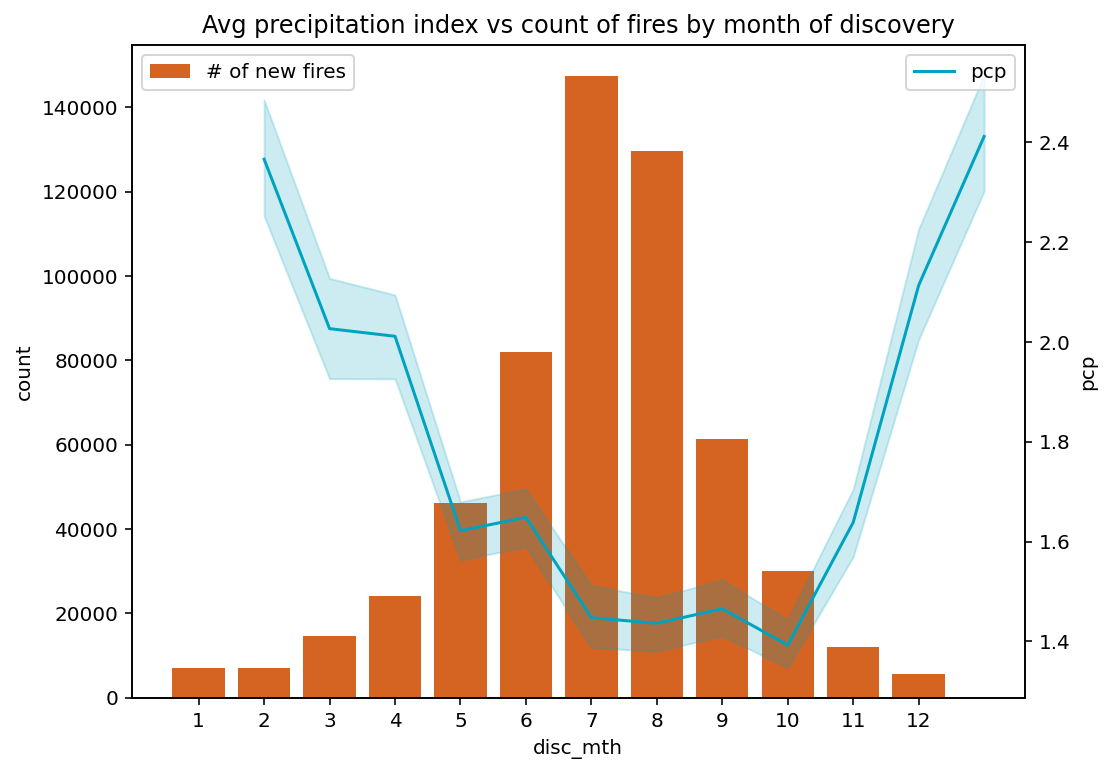

In [32]:
fig, ax1 = plt.subplots(figsize = (8,6))
sns.countplot(data = fire_df, x = 'disc_mth', color = '#F35B04', label = '# of new fires')
plt.legend(loc = 'upper left')
ax2 = ax1.twinx()
sns.lineplot(data = noaa_data, x = 'month', y = 'pcp', label = 'pcp', color = '#00a3bf') #hue = 'state'
plt.title('Avg precipitation index vs count of fires by month of discovery');

## Jesse ---------------------------------------------------------

put all of your code between here and the next person's name only

In [ ]:
import sqlite3
import pandas as pd
from urllib.request import urlopen
import json
import pandas as pd
from urllib.request import urlopen
import json
import plotly.express as px
import plotly.graph_objects as go

with urlopen('https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json') as response:
    counties = json.load(response)

In [ ]:
fire_map = pd.read_pickle('./data/fire_pickle.pkl')

In [ ]:
states_of_interest = ['CA','WA','OR','NV','AZ','NM','UT', 'CO', 'WY', 'ID', 'MT']

fire_map = fire_map[fire_map['STATE'].isin(states_of_interest)]

fire_map['STATE']=fire_map['STATE'].replace({'CA': '06', 
                       'WA': '53',
                      'OR': '41',
                      'NV': '32',
                      'AZ': '04',
                      'NM': '35',
                      'UT': '49',
                      'CO': '08',
                      'WY': '56',
                      'ID': '16',
                      'MT': '30',
                      })

fire_map['combined_fips'] =  fire_map['STATE'] + fire_map['FIPS_CODE']

In [ ]:
wildfire = fire_map.groupby(['combined_fips']).agg({'FIRE_SIZE': ['count']})

wildfire['FIPS_CODE'] = wildfire.index

wildfire.columns = ["FIPS_CODE", "FIRE_SIZE"]

wildfire.reset_index()

In [ ]:
wildfire_map = wildfire[['FIPS_CODE', 'count']]


fig = px.choropleth(wildfire_map, 
                    geojson=counties,
                    locations='FIPS_CODE',
                    color='count',
                           color_continuous_scale="Viridis",
                           range_color=(100, 6000),
                           scope="usa",
                           labels={'FIRE_SIZE':'FIRE_COUNT'}
                          )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

## CM ---------------------------------------------------------

put all of your code between here and the next person's name only

In [1]:
  ### For Window's Users
import os
os.environ['PROJ_LIB'] = r'C:\Users\cmrjk\Anaconda3\pkgs\proj4-5.2.0-ha925a31_1\Library\share'
from mpl_toolkits.basemap import Basemap
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [67]:
fire_position = pd.read_csv('./data/fire_lat_lon.csv', index_col=False)
fire_position.head()

In [68]:
fire_position['fire_size_class'] = fire_position['fire_size_class'].map({'A':int(1),
                                                                         'B':int(2), 
                                                                         "C":int(3),
                                                                         "D":int(4),
                                                                         "E": int(5),
                                                                         "F": int(6),
                                                                         "G":int(7)})

In [69]:
fire_position = fire_position[fire_position['year'] == 2011]
fire_position.reset_index(inplace=True)
fire_position.index

RangeIndex(start=0, stop=14856, step=1)

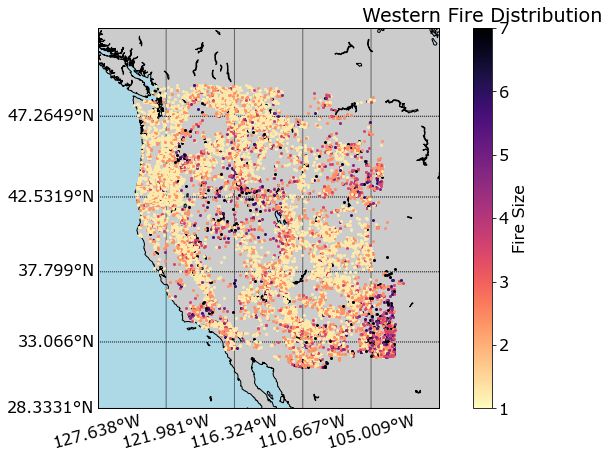

In [96]:
# Grabbing the lats and longs data
lats = []
lons = []
fire_class_list = []
for i in fire_position.index:
    lats.append(fire_position['latitude'][i])
    lons.append(fire_position['longitude'][i])
    fire_class_list.append(float(fire_position['fire_size_class'][i]))

# found this out on 
# https://makersportal.com/blog/2018/7/20/geographic-mapping-from-a-csv-file-using-python-and-basemap

# setting parameters for title and axes
font = {'family' : 'verdana',
        'size'   : 16}
matplotlib.rc('font', **font)

# How much to zoom from coordinates (in degrees)
zoom_scale = 3

# Setup the bounding box for the zoom and bounds of the map
bbox = [np.min(lats)-zoom_scale,np.max(lats)+zoom_scale,\
        np.min(lons)-zoom_scale,np.max(lons)+zoom_scale]

fig, ax = plt.subplots(figsize=(12,7))

# Define the projection, scale, the corners of the map, and the resolution.
m = Basemap(projection='merc',llcrnrlat=bbox[0],urcrnrlat=bbox[1],\
            llcrnrlon=bbox[2],urcrnrlon=bbox[3],lat_ts=10,resolution='i')

# Draw coastlines and fill continents and water with color
m.drawcoastlines()
m.fillcontinents(color='#CCCCCC',lake_color='lightblue')

# draw parallels, meridians, and color boundaries
m.drawparallels(np.arange(bbox[0],bbox[1],(bbox[1]-bbox[0])/5),labels=[1,0,0,0])
m.drawmeridians(np.arange(bbox[2],bbox[3],(bbox[3]-bbox[2])/5),labels=[0,0,0,1],rotation=15)
m.drawmapboundary(fill_color='lightblue')

# format colors for fire
fire_min = 1
fire_max = 7
cmap = plt.get_cmap('magma_r')
normalize = matplotlib.colors.Normalize(vmin=fire_min, vmax=fire_max)


for ii in range(0, len(fire_class_list)):
    x,y = m(lons[ii],lats[ii])
    color_interp = np.interp(fire_class_list[ii],[fire_min, fire_max],[10,300])
    plt.plot(x,y,marker='o',markersize=2,color=cmap(int(color_interp)))

# formating the color bar    
cax, _ = matplotlib.colorbar.make_axes(ax)
cbar = matplotlib.colorbar.ColorbarBase(cax, cmap=cmap,norm=normalize,label='Fire Size')
    



# save the figure and show it
plt.title("Western Fire Distribution")
plt.savefig('./visuals/firemap_latlong.png', format='png', dpi=500,transparent=True)
plt.show()

In [2]:
fire_df = pd.read_pickle('./data/clean_fire_pickle.pkl')

In [3]:
fire_df['time_burnt'].max()

364.0

## Kira ---------------------------------------------------------

put all of your code between here and the next person's name only